<a href="https://colab.research.google.com/github/AAKANKSHA123-123/MTECH-PROJECT/blob/main/Newcodevisualvgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction and data collection**

In [1]:
#importing packages
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import json
from google.colab import drive

In [2]:
import tensorflow as tf

# We'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
#import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np
import pandas as pd
import os
import time
import json
import collections
import operator
from glob import glob
from PIL import Image
import pickle
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from tensorflow import reshape
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Embedding, LSTM, Activation,ZeroPadding1D,Conv1D

print("Done imports")

Done imports


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

**Mounting drive for saving data**

In [4]:
drive.mount('/content/drive/', force_remount=True) #mouting the drive

Mounted at /content/drive/


**Downloading COCO images**

**Downloading VQA Questions**

In [5]:
annotation_zip = tf.keras.utils.get_file('captions.zip',cache_subdir=os.path.abspath('.'),origin = 'http://images.cocodataset.org/annotations/annotations_trainval2014.zip',extract = True)

annotation_file = os.path.dirname(annotation_zip)+'/annotations/captions_train2014.json'

name_of_zip = 'train2014.zip'
if not os.path.exists(os.path.abspath('.')+'/' + name_of_zip):
  image_zip = tf.keras.utils.get_file(name_of_zip,cache_subdir=os.path.abspath('.'),origin='http://images.cocodataset.org/zips/train2014.zip',extract=True)
  PATH = os.path.dirname(image_zip)+'/train2014'
else:
  PATH = os.path.abspath('.')+'/train2014'  

13510582272/13510573713 [==============================] - 563s 0us/step


In [6]:
print(PATH)
#!wget https://s3.amazonaws.com/cvmlp/vqs/mscoco/vqa/v2_Questions_Train_mscoco.zip
#!unzip -a v2_Questions_Train_mscoco.zip
!wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Train_mscoco.zip
!unzip -a v2_Annotations_Train_mscoco.zip
!wget https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip
!unzip -a v2_Questions_Train_mscoco.zip

/content/train2014
--2021-10-27 04:24:42--  https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Train_mscoco.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.46.54
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.46.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21708861 (21M) [application/zip]
Saving to: ‘v2_Annotations_Train_mscoco.zip’

v2_Annotations_Trai 100%[===================>]  20.70M  17.2MB/s    in 1.2s    

2021-10-27 04:24:44 (17.2 MB/s) - ‘v2_Annotations_Train_mscoco.zip’ saved [21708861/21708861]

Archive:  v2_Annotations_Train_mscoco.zip
  inflating: v2_mscoco_train2014_annotations.json  [text]  
--2021-10-27 04:24:46--  https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.46.54
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.46.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7239401 (6.9M) [applic

In [7]:
# read the json file
question_file_path = 'v2_OpenEnded_mscoco_train2014_questions.json'
with open(question_file_path, 'r') as f:
    questions = json.load(f)

print("Total Number Questions is : ",len(questions['questions']))

Total Number Questions is :  443757


**Added code from separate image model**

In [8]:
#Storing the captions and image file name in vectors
import collections
import operator

annotation_file = 'v2_mscoco_train2014_annotations.json'

with open(annotation_file,'r') as f:
  annotations = json.load(f)



all_answers = []
all_answers_qids = []
all_img_name_vector = []

for annot in annotations['annotations']:
  #print(annot)
  ans_dic = collections.defaultdict(int)
  for each in annot['answers']:
    diffans = each['answer']
    if diffans in ans_dic:
      #print(each['answer_confidence'])
      if each['answer_confidence']=='yes':
        ans_dic[diffans]+=4
      if each['answer_confidence']=='maybe':
        ans_dic[diffans]+=2
      if each['answer_confidence']=='no':
        ans_dic[diffans]+=1
    else:
      if each['answer_confidence']=='yes':
        ans_dic[diffans]+=4
      if each['answer_confidence']=='maybe':
        ans_dic[diffans]+=2
      if each['answer_confidence']=='no':
        ans_dic[diffans]+=1

  #print(ans_dic)
  most_fav = max(ans_dic.items(),key=operator.itemgetter(1))[0]
  #print(most_fav)
  caption = '<start>' + most_fav + '<end>'  #each['answer']

  image_id = annot['image_id']
  question_id = annot['question_id']
  full_coco_image_path = PATH  + '/COCO_train2014_' + '%012d.jpg' %(image_id)

  all_img_name_vector.append(full_coco_image_path)
  all_answers.append(caption)
  all_answers_qids.append(question_id)










In [9]:
all_questions = []
question_ids = []
all_img_name_vector_2 = []


for annot in questions['questions']:
  caption = '<start>' + annot['question'] + '<end>'
  image_id = annot['image_id']
  full_coco_image_path = PATH + '/COCO_train2014_' + '%012d.jpg' %(image_id)
  
  all_img_name_vector_2.append(full_coco_image_path)
  all_questions.append(caption)
  #print(all_questions)
  question_ids.append(annot['question_id'])

In [10]:
print(questions['questions'][np.random.randint(0,443757)])#new ms coco code

{'image_id': 576427, 'question': 'What laptop is this?', 'question_id': 576427000}


In [11]:
#Taken from separate image model
print(len(all_img_name_vector),len(all_answers),len(all_answers_qids))
print(all_img_name_vector[10:15],all_answers[10:15],all_answers_qids[10:15])
print(len(all_img_name_vector_2),len(all_questions),len(question_ids))
print(all_img_name_vector_2[10:15],all_questions[10:15],question_ids[10:15])

443757 443757 443757
['/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393223.jpg', '/content/train2014/COCO_train2014_000000393223.jpg'] ['<start>yes<end>', '<start>yes<end>', '<start>contrail<end>', '<start>yes<end>', '<start>white and purple<end>'] [393221000, 393221001, 393221002, 393223000, 393223001]
443757 443757 443757
['/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393221.jpg', '/content/train2014/COCO_train2014_000000393223.jpg', '/content/train2014/COCO_train2014_000000393223.jpg'] ['<start>Is the sky blue?<end>', '<start>Is there snow on the mountains?<end>', '<start>What is the white streak?<end>', '<start>Is the window open?<end>', '<start>What color is the toothbrush?<end>'] [393221000, 393221001, 393221002, 393223000, 

**Shuffling all questions and answers(taken from separate image model)**

In [12]:
train_answers,train_questions,img_name_vector = shuffle(all_answers,all_questions,all_img_name_vector,random_state=1)
#train_answers,train_questions,img_name_vector = (all_answers,all_questions,all_img_name_vector)
num_examples=50

train_answers = train_answers[:num_examples]
train_questions = train_questions[:num_examples]
img_name_vector =img_name_vector[:num_examples]

print(img_name_vector[0],train_questions[0],train_answers[0])
print(len(img_name_vector),len(train_questions),len(train_answers))

/content/train2014/COCO_train2014_000000573744.jpg <start>Is this a happy animal?<end> <start>yes<end>
50 50 50


**Downloading VQA Annotations**

In [13]:
annotation_file_path = 'v2_mscoco_train2014_annotations.json'
with open(annotation_file_path, 'r') as f:
    annotations = json.load(f)

In [14]:
annotations['annotations'][np.random.randint(0,443757)]

{'answer_type': 'yes/no',
 'answers': [{'answer': 'my best guess is yes',
   'answer_confidence': 'yes',
   'answer_id': 1},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'no', 'answer_confidence': 'maybe', 'answer_id': 7},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 8},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 9},
  {'answer': 'yes', 'answer_confidence': 'no', 'answer_id': 10}],
 'image_id': 293800,
 'multiple_choice_answer': 'yes',
 'question_id': 293800002,
 'question_type': 'are there'}

In [15]:
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


**Data preprocessing**


In [16]:
#importing packages
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import json
import seaborn as sns
import tensorflow as tf

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from wordcloud import WordCloud
from google.colab import drive

Populating the interactive namespace from numpy and matplotlib


**Variables**

**DATA TRANSFORMATION**
LOADING QUESTIONS AND ANSWERS

In [17]:
with open(question_file_path, 'r') as f:
    questions = json.load(f)
    questions = questions["questions"]

with open(annotation_file_path, 'r') as f:
    annotations = json.load(f)
    annotations = annotations["annotations"]

In [18]:
print("Total Number Questions is : ",len(questions))

Total Number Questions is :  443757


In [19]:
questions_df = pd.DataFrame(questions).sample(n=10000)
#ques_samp = questions_df.sample(n=100)
#ques_samp.head(5)

questions_df.head(5)

,image_id,question,question_id
216124,39711,How many sides are on the sign?,39711002
274399,472058,What is the building made of?,472058009
150402,435716,How many plates are on the table?,435716004
303697,579042,Is she at a restaurant?,579042001
288243,476447,Are the trees in the far background deciduous ...,476447003


In [20]:
annotations_df = pd.DataFrame(annotations).sample(n=10000)
#annot_samp = annotations_df.sample(n=100)
#annot_samp.head(5)
annotations_df.head(5)
print(len(annotations_df))

10000


**MERGING QUESTIONS AND ANNOTATIONS**

In [21]:
data = pd.merge(questions_df,annotations_df,  how='inner', left_on=['image_id','question_id'], right_on = ['image_id','question_id'])
#data_samp = pd.merge(ques_samp,annot_samp,  how='inner', left_on=['image_id','question_id'], right_on = ['image_id','question_id'])
print(len(data))


271


In [22]:
data.head(5)
#data_samp.head(5)

,image_id,question,question_id,question_type,multiple_choice_answer,answers,answer_type
0,147347,What is the weather like in this picture?,147347001,what is the,rainy,"[{'answer': 'rain', 'answer_confidence': 'yes'...",other
1,105576,Are there any cans on the table?,105576002,are there any,no,"[{'answer': 'no', 'answer_confidence': 'yes', ...",yes/no
2,287988,Is there diced tomatoes in this meal?,287988011,is there,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no
3,95326,What is the number on the bus?,95326000,what is the,757,"[{'answer': '757', 'answer_confidence': 'yes',...",number
4,264676,What is the most common vehicle color here?,264676003,what is the,black,"[{'answer': 'black', 'answer_confidence': 'may...",other


In [23]:
#currentDirectory = "/content/drive/My Drive/pcase_study_2/"
#os.chdir(currentDirectory)
#currentDirectory = ""
#dataDirectory = currentDirectory + "data/"
#imageDirectory = dataDirectory + "train2014/"
imageDirectory = '/content/train2014'
#question_file_path = dataDirectory + 'v2_OpenEnded_mscoco_train2014_questions.json'
question_file_path = '/content/v2_OpenEnded_mscoco_train2014_questions.json'
#annotation_file_path = dataDirectory + 'v2_mscoco_train2014_annotations.json'
annotation_file_path = '/content/v2_mscoco_train2014_annotations.json'

In [24]:
imageDirectory = '/content/train2014'
os.chdir(imageDirectory)
imageDirectory = ""

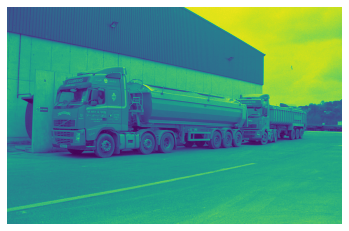

In [25]:
index = np.random.randint(0,len(data))#263115

img_path =  imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (data['image_id'][index])
img=mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()
print("*"*50)
print("Question : " ,data['question'][index])
print("*"*50)
print("Answer : ", data['multiple_choice_answer'][index])

print(img.shape)

**IMAGES**

**************************************************
Question :  Can you see any red in the photo?
**************************************************
Answer :  no
(415, 640)
     image_id  question
0        4180         1
1        5469         1
2        7535         1
3        8794         1
4       21166         1
..        ...       ...
263    578376         1
264    579188         1
265    579907         1
266    580505         1
267    581218         1

[268 rows x 2 columns]
268
Max number of questions on a image 2
Min number of questions on a image 1
Mean of questions on a image 1.0111940298507462


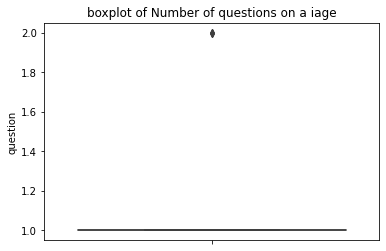

In [26]:
aggregations = {'question': 'count'}
temp = pd.DataFrame(data.groupby(['image_id'],as_index=False).agg(aggregations))
#temp.set_index('image_id', inplace=True)

print(temp)
print(len(temp))
num_of_ques_in_image = temp['question'].values
print("Max number of questions on a image",max(num_of_ques_in_image))
print("Min number of questions on a image",min(num_of_ques_in_image))
print("Mean of questions on a image",np.mean(num_of_ques_in_image))

ax = sns.boxplot(y = 'question', data = temp) 
plt.title("boxplot of Number of questions on a iage")
plt.show()

**IMAGES THAT HAVE MAXIMUM NUMBER OF QUESTIONS**

**Duplicate questions on same image**

In [27]:
aggregations = {'question_id':'count', 'multiple_choice_answer': lambda x: " || ".join(x)}
temp = pd.DataFrame(data.groupby(['image_id','question'],as_index=False).agg(aggregations)).rename(columns={'question_id':'count'})
temp = temp[temp['count']>1]
temp

,image_id,question,count,multiple_choice_answer


**Question type**

In [28]:
data.question_type.unique()

array(['what is the', 'are there any', 'is there', 'what color is the',
       'are there', 'how', 'what does the', 'is this', 'is it', 'what is',
       'how many', 'what color are the', 'are these', 'what kind of',
       'where are the', 'is the', 'what number is', 'who is', 'why',
       'how many people are', 'does the', 'is this a', 'what',
       'what are the', 'are they', 'is there a', 'has', 'what animal is',
       'none of the above', 'is', 'do', 'is the man', 'where is the',
       'can you', 'what type of', 'what color', 'are the', 'are', 'which',
       'what color is', 'what is the man', 'what sport is',
       'what is on the', 'why is the', 'what time', 'what is in the',
       'could', 'what is the color of the', 'was', 'does this',
       'what is this', 'what are', 'is he', 'what room is'], dtype=object)

In [29]:
print("Number of unique Question type in dataset : ",len(data.question_type.unique()))

Number of unique Question type in dataset :  54


In [30]:
def getFrequnctDict(data,column,isJoin=False):
    column_frequency = {}

    for _row in data[column]:
        if isJoin:
            _row = "_".join(_row.split())
        if(column_frequency.get(_row,-1) > 0):
            column_frequency[_row] += 1
        else:
            column_frequency[_row] = 1

    return column_frequency

def lineChart(data,column,top=20,isJoin=False):
    column_frequncy = getFrequnctDict(data,column,isJoin)
    sort_column_frequncy = sorted(list(column_frequncy.items()),key = lambda x: x[1],reverse=True)
    total_samples =  len(data)

    plt.plot([x[1]for x in sort_column_frequncy[:top]])
    i=np.arange(top)
    plt.title("Frequency of top " + str(top) + " " + column )
    plt.xlabel("Tags")
    plt.ylabel("Counts")
    plt.xticks(i,[x[0] for x in sort_column_frequncy[:top]])
    plt.xticks(rotation=90)
    plt.show()
    return sort_column_frequncy

def plotWordCloud(data,column,isJoin=False):
    column_frequncy = getFrequnctDict(data,column,isJoin)
    #https://www.geeksforgeeks.org/generating-word-cloud-python/
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = None, 
                    min_font_size = 10).generate_from_frequencies(column_frequncy)
    # plot the WordCloud image     
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("WordCloud on "+ column)  
    plt.show()

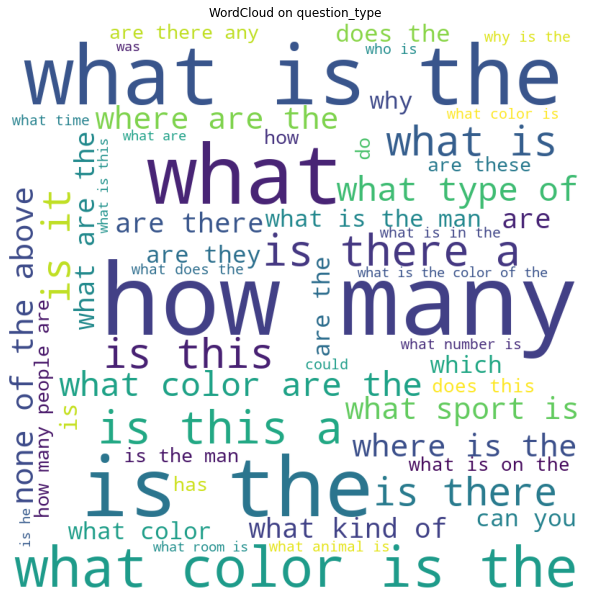

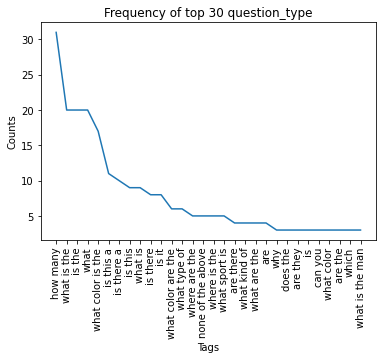

In [31]:
plotWordCloud(data, 'question_type')
question_type_frequncy = lineChart(data, 'question_type', top = 30)

In [32]:
for _type,_count in question_type_frequncy[:10]:
    print("Percentage of '" + _type + "' Type of Questions in Dataset is ", str(100*_count/len(data))) 

Percentage of 'how many' Type of Questions in Dataset is  11.439114391143912
Percentage of 'what is the' Type of Questions in Dataset is  7.380073800738008
Percentage of 'is the' Type of Questions in Dataset is  7.380073800738008
Percentage of 'what' Type of Questions in Dataset is  7.380073800738008
Percentage of 'what color is the' Type of Questions in Dataset is  6.273062730627307
Percentage of 'is this a' Type of Questions in Dataset is  4.059040590405904
Percentage of 'is there a' Type of Questions in Dataset is  3.690036900369004
Percentage of 'is this' Type of Questions in Dataset is  3.321033210332103
Percentage of 'what is' Type of Questions in Dataset is  3.321033210332103
Percentage of 'is there' Type of Questions in Dataset is  2.952029520295203


**ANSWERS**

In [33]:
data['answer_type'].unique()

array(['other', 'yes/no', 'number'], dtype=object)

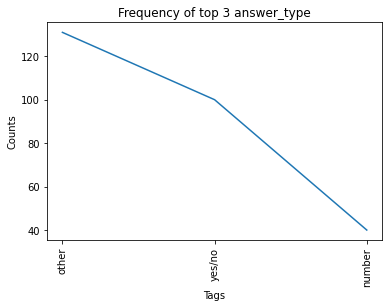

In [34]:
answer_type_frequncy = lineChart(data, 'answer_type', top = 3)

In [35]:
for _type,_count in answer_type_frequncy:
    print("Percentage of '" + _type + "' Type of Answers in Dataset is ", str(100*_count/len(data)) )

Percentage of 'other' Type of Answers in Dataset is  48.33948339483395
Percentage of 'yes/no' Type of Answers in Dataset is  36.90036900369004
Percentage of 'number' Type of Answers in Dataset is  14.760147601476016


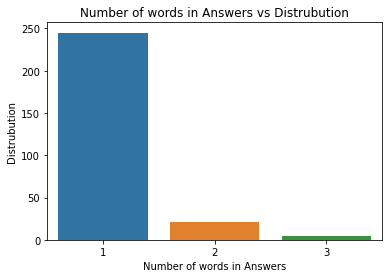

In [36]:
sns.countplot(data["multiple_choice_answer"].apply(lambda x: len(x.split())).values)
plt.title("Number of words in Answers vs Distrubution")
plt.xlabel("Number of words in Answers")
plt.ylabel("Distrubution")
plt.show()

**QUESTION**

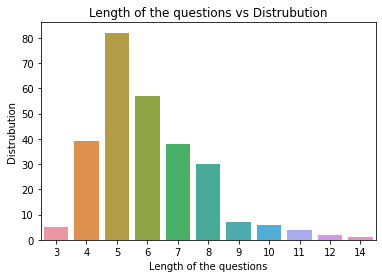

In [37]:
sns.countplot(data["question"].apply(lambda x: len(x.split())).values)
plt.title("Length of the questions vs Distrubution")
plt.xlabel("Length of the questions")
plt.ylabel("Distrubution")
plt.show()

**QUESTION TYPE AND ANSWER**

In [38]:
temp = data
top_question = [x[0] for x in question_type_frequncy[:50]]
print(top_question)
top_aswers = [x[0] for x in answer_type_frequncy[:50]]
print(top_aswers)
temp = data[(data['question_type'].isin(top_question) | data['multiple_choice_answer'].isin(top_aswers))]

aggregations = {'question': 'count'}
temp = pd.DataFrame(temp.groupby(['question_type','multiple_choice_answer'],as_index= False).agg(aggregations))
temp = temp[temp['question']>=10]
temp = temp.pivot(index='question_type', columns='multiple_choice_answer', values='question')
#print(temp)

['how many', 'what is the', 'is the', 'what', 'what color is the', 'is this a', 'is there a', 'is this', 'what is', 'is there', 'is it', 'what color are the', 'what type of', 'where are the', 'none of the above', 'where is the', 'what sport is', 'are there', 'what kind of', 'what are the', 'are', 'why', 'does the', 'are they', 'is', 'can you', 'what color', 'are the', 'which', 'what is the man', 'are there any', 'how', 'are these', 'how many people are', 'has', 'do', 'is the man', 'what is on the', 'does this', 'what does the', 'what number is', 'who is', 'what animal is', 'what color is', 'why is the', 'what time', 'what is in the', 'could', 'what is the color of the', 'was']
['other', 'yes/no', 'number']


**QUESTION TYPE VS ANSWER**

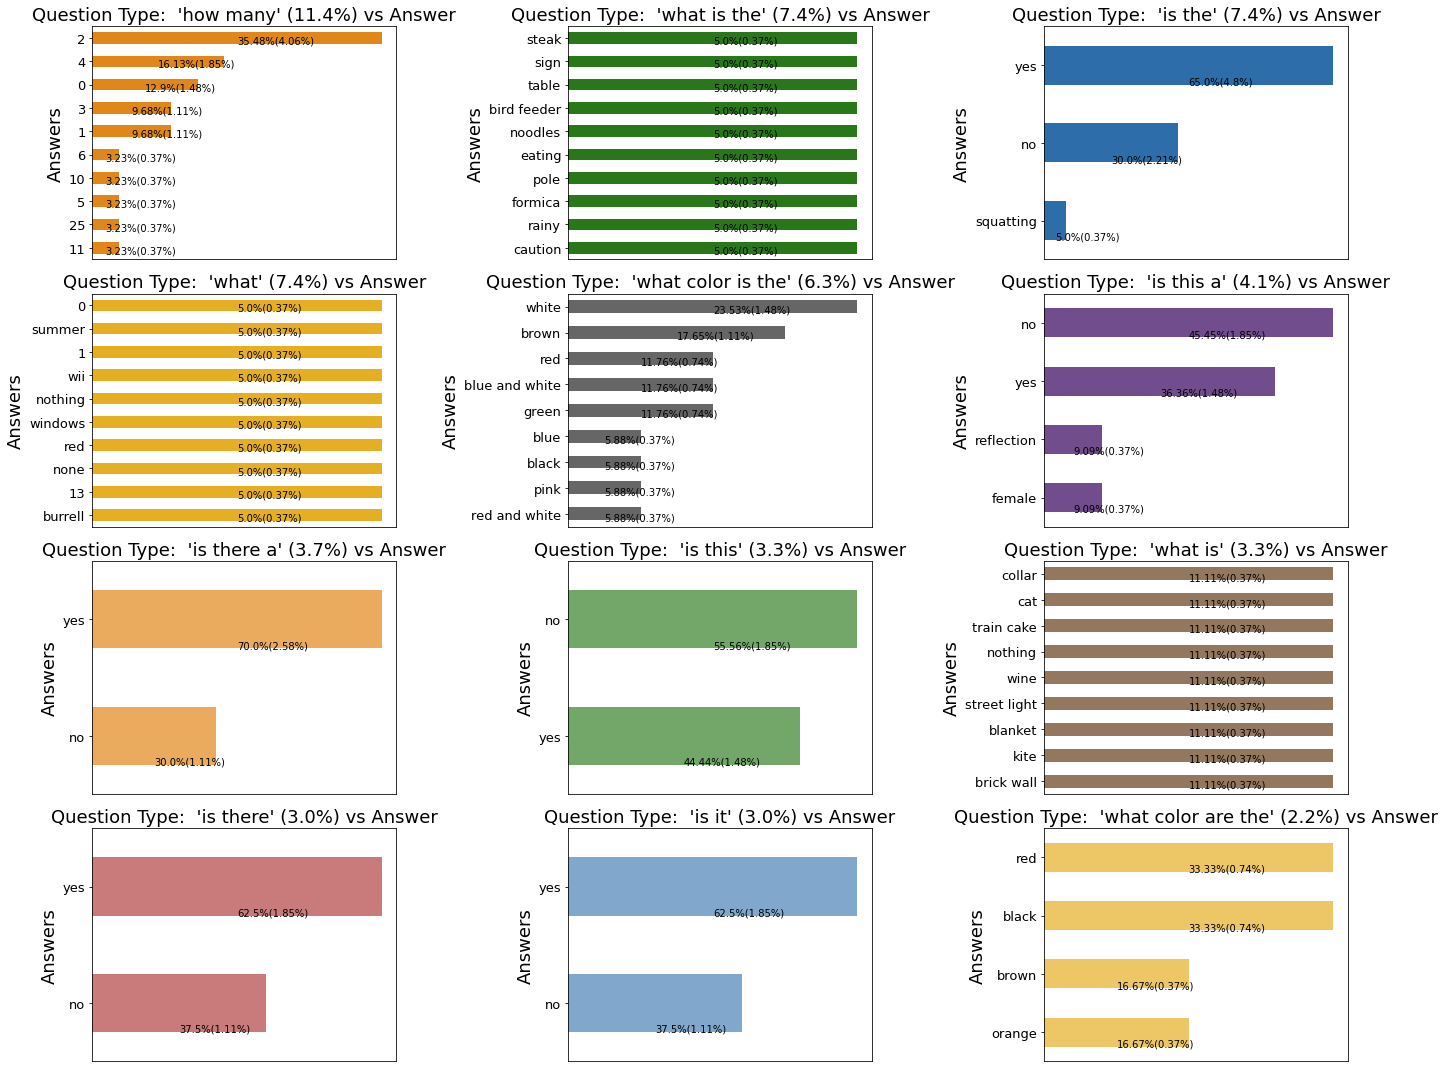

In [39]:
fig = plt.figure(figsize=(80,30))
fig.tight_layout() 
count = 1
colorCodes = [ "#E18719", "#287819", "#2D6EAA", "#E6AF23", "#666666","#724D8D", "#EAAB5E", "#73A769","#93785F",
              "#C97B7B", "#81A8CC", "#EDC765", "#858585","#957AA9", "#F3CFA3","#B4D0AF", "#BEADA0", "#E4BDBD", 
              "#ABC5DD", "#F4DB9C", "#A3A3A3"]

for _type,_ in question_type_frequncy[:12]:

    percentage = str(round((len(data[data['question_type']==_type])/len(data))*100,1))+'%'

    plt.subplot(4, 3, count)
    temp = data[data['question_type']==_type]
    ax = temp['multiple_choice_answer'].value_counts()[:10][::-1].plot(kind='barh', figsize=(20,15),color=colorCodes[count-1], fontsize=13)
    ax.set_alpha(0.8)   
    ax.set_title("Question Type:  '" + _type + "' (" + percentage + ") vs Answer" , fontsize=18)
    ax.set_ylabel("Answers", fontsize=18)
    ax.get_xaxis().set_visible(False)


    for i in ax.patches:
        ax.text(i.get_width()/2, i.get_y(), str(round((i.get_width()/len(temp))*100, 2))+'%' + "(" +
                str(round((i.get_width()/len(data))*100, 2))+'%' +")", fontsize=10,color='black')
        
    count += 1

fig.tight_layout()
plt.show()

**ANSWERS VS QUESTION TYPE**

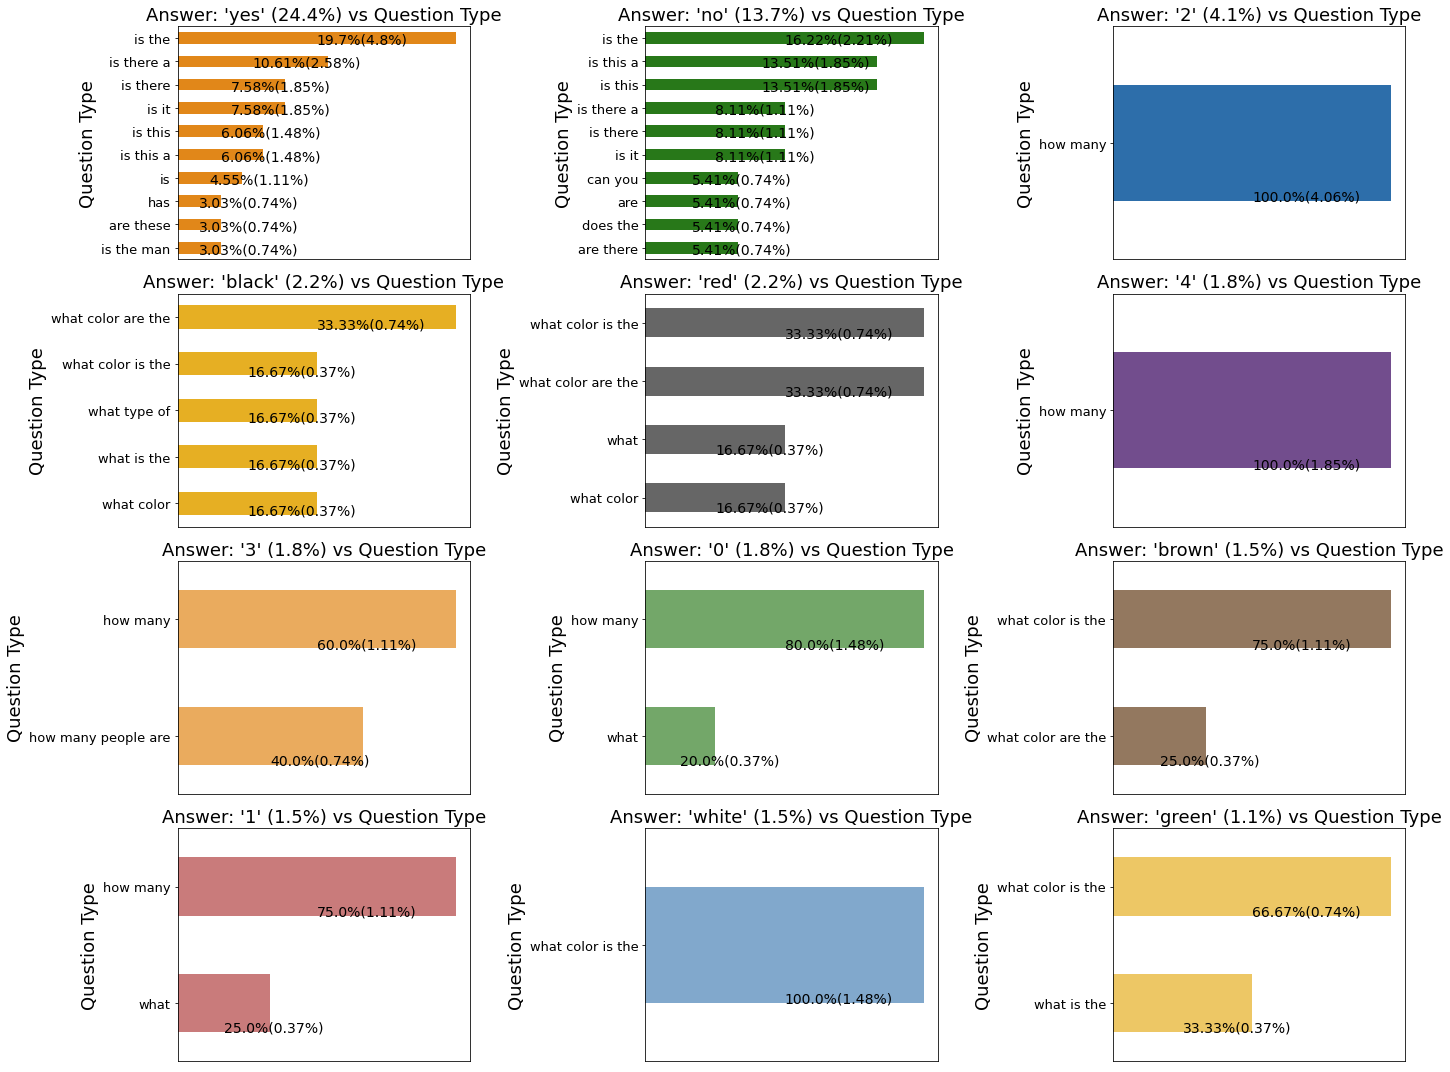

In [40]:
fig = plt.figure()
fig.tight_layout() 
count = 1

colorCodes = [ "#E18719", "#287819", "#2D6EAA", "#E6AF23", "#666666","#724D8D", "#EAAB5E", "#73A769","#93785F",
              "#C97B7B", "#81A8CC", "#EDC765", "#858585","#957AA9", "#F3CFA3","#B4D0AF", "#BEADA0", "#E4BDBD", 
              "#ABC5DD", "#F4DB9C", "#A3A3A3"]

answer_frequncy = sorted(list(getFrequnctDict(data,'multiple_choice_answer').items()),key = lambda x: x[1],reverse=True)

for _type,_ in answer_frequncy[:12]:

    percentage = str(round((len(data[data['multiple_choice_answer']==_type])/len(data))*100,1))+'%'

    plt.subplot(4, 3, count)
    temp = data[data['multiple_choice_answer']==_type]
    ax = temp['question_type'].value_counts()[:10][::-1].plot(kind='barh', figsize=(20,15),color=colorCodes[count-1], fontsize=13)
    ax.set_alpha(0.8)   
    ax.set_title("Answer: '" + _type + "' (" + percentage + ") vs Question Type" , fontsize=18)
    ax.set_ylabel("Question Type", fontsize=18)
    ax.get_xaxis().set_visible(False)

    for i in ax.patches:
        ax.text(i.get_width()/2, i.get_y(), str(round((i.get_width()/len(temp))*100, 2))+'%' + "(" +
                str(round((i.get_width()/len(data))*100, 2))+'%' +")", fontsize=14,color='black')
        
    count += 1

fig.tight_layout()
plt.show()

**CHECKING IF ACTUAL ANSWER IS SAME AS PERSONS ANSWERS**

In [41]:
def getPeopleAnswer(answers):
    answers_dict = {}
    score_dict = { 'yes' : 3, 'maybe' : 2, 'no' : 1 }
    for _answer in answers:
        score = score_dict[_answer['answer_confidence']]
        if answers_dict.get(_answer['answer'],-1) != -1 :
            answers_dict[_answer['answer']] += score
        else:
            answers_dict[_answer['answer']] = score

    return sorted(list(answers_dict.items()),key = lambda x: x[1],reverse=True)[0][0]

In [42]:
#data['derived_answer'] =  data["answers"].apply(lambda x: getPeopleAnswer(x))

In [43]:
#data[ data['derived_answer'] != data['multiple_choice_answer']]

In [44]:
!pwd

/content/train2014


In [45]:

dataDDirectory ='/content/drive/MyDrive/newresults'
os.chdir(dataDDirectory)
!pwd
data.to_csv(dataDDirectory + 'data.csv')

/content/drive/MyDrive/newresults


In [46]:
os.listdir(dataDDirectory)

['Models', '.ipynb_checkpoints', 'data', 'filenamert.pickle']

**Modelling**

In [47]:
import warnings
warnings.filterwarnings("ignore")

import pickle
import os
import pandas as pd
import random as rn
import numpy as np
import tensorflow as tf
from google.colab import drive
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.regularizers import l1,l2
from tqdm import tqdm
import heapq
from sklearn.utils import shuffle
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


**Variables**

In [48]:
currentDirectory = "/content/drive/MyDrive/newresults/"
os.chdir(currentDirectory)
currentDirectory = ""
dataDirectory = currentDirectory + "data/"
#imageDirectory = dataDirectory + "train2014/"
imageDirectory = '/content/train2014/'
imageNumpyDirectory = dataDirectory + "train2014_Numpy" + ''

modelsDirectory = currentDirectory + "Models/"


img_width = 224
img_height = 224

#BATCH_SIZE = 64
BATCH_SIZE = 1
BUFFER_SIZE = 300

In [49]:
#len(os.listdir(imageNumpyDirectory))
data = pd.read_csv(dataDDirectory + 'data.csv')
X_train, X_val = train_test_split(data, test_size=0.2, random_state=42)

**Creating answer vectors**

In [50]:
contractions = { 
"ain't": "am not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because","could've": "could have","couldn't": "could not",
"couldn't've": "could not have","didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have",
"hasn't": "has not","haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will","he's": "he is","how'd": "how did",
"how'll": "how will","how's": "how is","i'd": "i would","i'll": "i will","i'm": "i am","i've": "i have","isn't": "is not","it'd": "it would",
"it'll": "it will","it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not",
"must've": "must have","mustn't": "must not","needn't": "need not","oughtn't": "ought not","shan't": "shall not","sha'n't": "shall not","she'd": "she would",
"she'll": "she will","she's": "she is","should've": "should have","shouldn't": "should not","that'd": "that would","that's": "that is","there'd": "there had",
"there's": "there is","they'd": "they would","they'll": "they will","they're": "they are","they've": "they have","wasn't": "was not","we'd": "we would",
"we'll": "we will","we're": "we are","we've": "we have","weren't": "were not","what'll": "what will","what're": "what are","what's": "what is",
"what've": "what have","where'd": "where did","where's": "where is","who'll": "who will","who's": "who is","won't": "will not","wouldn't": "would not",
"you'd": "you would","you'll": "you will","you're": "you are"
}

def preprocess_english(text):
    '''Given a text this function removes the punctuations and returns the remaining text string'''
    new_text = ""
    text = text.lower()
    i = 0
    for word in text.split():
      if i==0:
        new_text = contractions.get(word,word)
      else:
        new_text = new_text + " " + contractions.get(word,word)
      i += 1
    return new_text.replace("'s", '')

In [51]:
X_train['multiple_choice_answer'] = X_train['multiple_choice_answer'].apply(lambda x: preprocess_english(x))
X_val['multiple_choice_answer'] = X_val['multiple_choice_answer'].apply(lambda x: preprocess_english(x))

In [52]:
all_classes = X_train['multiple_choice_answer'].values
class_frequency = {}

for _cls in all_classes:
    if(class_frequency.get(_cls,-1)>0):
        class_frequency[_cls] += 1
    else:
        class_frequency[_cls] = 1

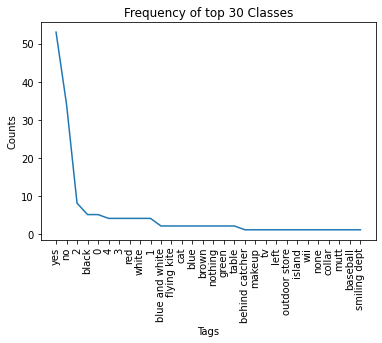

In [53]:
sort_class_frequency = sorted(list(class_frequency.items()),key = lambda x: x[1],reverse=True)   

plt.plot([x[1] for x in sort_class_frequency[:30]])
i=np.arange(30)
plt.title("Frequency of top 30 Classes")
plt.xlabel("Tags")
plt.ylabel("Counts")
plt.xticks(i,[x[0] for x in sort_class_frequency[:30]])
plt.xticks(rotation=90)
plt.show()

5 most frequent Classes covers 48.61% points
10 most frequent Classes covers 57.87% points
20 most frequent Classes covers 66.20% points
50 most frequent Classes covers 80.09% points
70 most frequent Classes covers 89.35% points
100 most frequent Classes covers 100.00% points
200 most frequent Classes covers 100.00% points
500 most frequent Classes covers 100.00% points
750 most frequent Classes covers 100.00% points
1000 most frequent Classes covers 100.00% points
2000 most frequent Classes covers 100.00% points
3000 most frequent Classes covers 100.00% points
5000 most frequent Classes covers 100.00% points


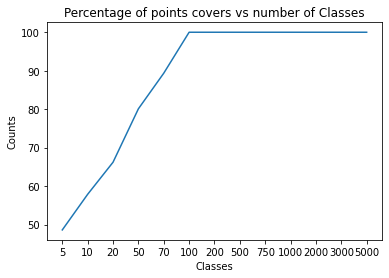

In [54]:
def getPercentageOfDataCoversGivenNumClasses(n_class, class_frequency, df):
    n_common_class = heapq.nlargest(n_class, class_frequency, key=class_frequency.get)
    count = 0
    for _class in df['multiple_choice_answer'].values:
        if(_class in n_common_class):
            count += 1

    return (count/len(df))*100
    
n_classes = [5,10,20,50,70,100,200,500,750,1000,2000,3000,5000]
percentage_cover = []
for i in n_classes:
    temp = getPercentageOfDataCoversGivenNumClasses(i,class_frequency,X_train)
    percentage_cover.append(temp)
    print("{} most frequent Classes covers {:.2f}% points".format(i,temp))


plt.plot(percentage_cover)
i=np.arange(len(percentage_cover))
plt.title("Percentage of points covers vs number of Classes")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.xticks(i,n_classes)
plt.show()

In [55]:
common_tags = heapq.nlargest(1000, class_frequency, key = class_frequency.get)
X_train['multiple_choice_answer'] =  X_train['multiple_choice_answer'].apply(lambda x: x if x in common_tags else '')

#removing question which has empty tags
X_train = X_train[X_train['multiple_choice_answer'].apply(lambda x: len(x)>0)]

In [56]:
label_encoder = LabelBinarizer()
answer_vector_train = label_encoder.fit_transform(X_train['multiple_choice_answer'].apply(lambda x: x).values)
answer_vector_val = label_encoder.transform(X_val['multiple_choice_answer'].apply(lambda x: x).values)

ans_vocab = {l: i for i, l in enumerate(label_encoder.classes_)}

print("Number of clasess: ", len(ans_vocab))
print("Shape of Answer Vectors in Train Data: ", answer_vector_train.shape)
print("Shape of Answer Vectors in Validation Data: ", answer_vector_val.shape)

Number of clasess:  93
Shape of Answer Vectors in Train Data:  (216, 93)
Shape of Answer Vectors in Validation Data:  (55, 93)


**Creating Image features using VGG19**

In [57]:
import pickle

def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (img_width, img_height))
    img = tf.keras.applications.vgg19.preprocess_input(img)
    img = img * (1./255)
    return img, image_path

def VGG19_Top():
    model = tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_shape = (img_width, img_height,3))
    #model = tf.keras.applications.VGG19(include_top=False,weights='imagenet',input_shape = (img_width, img_height,3))
    input_layer = model.input
    hidden_layer = model.layers[-1].output 
    model = tf.keras.Model(input_layer, hidden_layer)
    return model

def generateImageFeatures(images):
    model = VGG19_Top()
    all_image_dict = {}
  
    img_ds = tf.data.Dataset.from_tensor_slices(images)
    img_ds = img_ds.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)
    
    for batch_img, batch_path in img_ds:
        batch_img_features = model(batch_img)
        #print(batch_img_features)

        for img_features, path in zip(batch_img_features, batch_path):
            image_path = path.numpy().decode("utf-8")
            print(image_path)
            
            
            image_path = image_path.replace(imageDirectory,imageNumpyDirectory).replace('.jpg',"")
            print(image_path)
            np.save(image_path, img_features.numpy())
            all_image_dict[image_path] = img_features.numpy()
            print("Printing image features")
            #print(all_image_dict[image_path])
    
    with open('filenamert.pickle', 'wb') as handle:
        pickle.dump(all_image_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
    return

!pwd
all_image_path = data['image_id'].apply(lambda x:  imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (x)).unique()

  


generateImageFeatures(all_image_path)

/content/drive/MyDrive/newresults
58900480/58889256 [==============================] - 1s 0us/step
/content/train2014/COCO_train2014_000000147347.jpg
data/train2014_NumpyCOCO_train2014_000000147347
Printing image features
/content/train2014/COCO_train2014_000000105576.jpg
data/train2014_NumpyCOCO_train2014_000000105576
Printing image features
/content/train2014/COCO_train2014_000000287988.jpg
data/train2014_NumpyCOCO_train2014_000000287988
Printing image features
/content/train2014/COCO_train2014_000000095326.jpg
data/train2014_NumpyCOCO_train2014_000000095326
Printing image features
/content/train2014/COCO_train2014_000000264676.jpg
data/train2014_NumpyCOCO_train2014_000000264676
Printing image features
/content/train2014/COCO_train2014_000000256946.jpg
data/train2014_NumpyCOCO_train2014_000000256946
Printing image features
/content/train2014/COCO_train2014_000000089651.jpg
data/train2014_NumpyCOCO_train2014_000000089651
Printing image features
/content/train2014/COCO_train2014_000000

In [58]:
print(imageDirectory)

/content/train2014/


In [59]:
image_paths_train = X_train['image_id'].apply(lambda x:  imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (x)).values
image_paths_val = X_val['image_id'].apply(lambda x:  imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (x)).values
#print(image_paths_train)
with open('filenamert.pickle','rb') as handle:
    all_image_dict = pickle.load(handle)

#with open('all_image_dict_new.pickle', 'rb') as handle:
    #all_image_dict_new = pickle.load(handle)

all_image_dict.update(all_image_dict)
#del all_image_dict_new

**Creating question vectors**

In [60]:
def preprocess_english(text):
    '''Given a text this function removes the punctuations and returns the remaining text string'''
    new_text = "<start>"
    text = text.lower()
    for word in text.split():
      new_text = new_text + " " + contractions.get(word,word)
    new_text = new_text + " <end>"
    return new_text.replace("'s", '')

In [61]:
X_train['question'] = X_train['question'].apply(lambda x: preprocess_english(x))
X_val['question'] = X_val['question'].apply(lambda x: preprocess_english(x))

In [62]:
#tokenization
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token = "<unk>", filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')
tokenizer.fit_on_texts(X_train['question'].values)
train_question_seqs = tokenizer.texts_to_sequences(X_train['question'].values)
val_question_seqs = tokenizer.texts_to_sequences(X_val['question'].values)

print("Number of words in tokenizer:", len(tokenizer.word_index))
ques_vocab = tokenizer.word_index

#Padding
#tokenizer.word_index['<pad>'] = 0
#tokenizer.index_word[0] = '<pad>'
question_vector_train = tf.keras.preprocessing.sequence.pad_sequences(train_question_seqs, padding='post')
question_vector_val = tf.keras.preprocessing.sequence.pad_sequences(val_question_seqs,padding='post',maxlen=question_vector_train.shape[1])

print("Shape of Question Vectors in Train Data: ", question_vector_train.shape)
print("Shape of Question Vectors in Validation Data: ", question_vector_val.shape)

Number of words in tokenizer: 379
Shape of Question Vectors in Train Data:  (216, 16)
Shape of Question Vectors in Validation Data:  (55, 16)


**Creating dataset**

In [63]:
def get_imageTensor(img, ques):
    path = img.decode('utf-8').replace(imageDirectory,'/content/drive/MyDrive/newresults/data'+'/'+'train2014_Numpy').replace('.jpg',"") +'.npy'
    
    img_tensor = np.load(path)
    #img_tensor = all_image_dict[img.decode('utf-8')]
    
    return img_tensor, ques

In [64]:
def createDataset(image_paths,question_vector,answer_vector):
    dataset_input = tf.data.Dataset.from_tensor_slices((image_paths, question_vector.astype(np.float32)))
    dataset_output = tf.data.Dataset.from_tensor_slices((answer_vector.astype(np.float32)))
    # using map to load the numpy files in parallel
    dataset_input = dataset_input.map(lambda img, ques : tf.numpy_function(get_imageTensor, [img, ques], [tf.float32, tf.float32]),
                                      num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # shuffling and batching
    #dataset_input = dataset_input.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    dataset_input = dataset_input.batch(BATCH_SIZE)
    dataset_output = dataset_output.batch(BATCH_SIZE)#.repeat()
    
    dataset = tf.data.Dataset.zip((dataset_input, dataset_output))
    dataset = dataset.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

    return dataset

In [65]:
dataset_train = createDataset(image_paths_train, question_vector_train, answer_vector_train)
dataset_val = createDataset(image_paths_val, question_vector_val, answer_vector_val)
print(dataset_train)

<PrefetchDataset shapes: ((<unknown>, <unknown>), (None, 93)), types: ((tf.float32, tf.float32), tf.float32)>


**Baseline Model**

In [66]:
##fixing numpy RS
np.random.seed(42)

##fixing tensorflow RS
tf.random.set_seed(32)

##python RS
rn.seed(12)

In [67]:
def callBacksList():
    """
    returns list of callback's
    """
    filepath = modelsDirectory + ModelName + "/best.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'auto')
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3)
    early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 4, verbose = 1)

    #directory for tensorboard to save evnts
    log_dir= modelsDirectory + "logs/fit/" + ModelName + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    os.makedirs(log_dir)

    print("TensorBoard Folder for this Execution",log_dir)#creating TensorBoard call back,this will write all events to given folder
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

    history = tf.keras.callbacks.History()
    callbacks_list = [reduce_lr, early_stop, history, tensorboard_callback, checkpoint]
    return callbacks_list

def Build_BaseModel():
    image_input = tf.keras.layers.Input(shape=(7,7,512))
    question_input = tf.keras.layers.Input(shape=(question_vector_train.shape[1],))

    image_conv_layer1 = tf.keras.layers.Conv2D(filters = 4096, kernel_size = 7 , strides = 1, padding = "valid", activation = 'relu',
                                               kernel_initializer = tf.keras.initializers.he_normal(seed=45))(image_input)

    image_flatten = tf.keras.layers.Flatten()(image_conv_layer1)

    image_dense_1 = tf.keras.layers.Dense(4096, activation = tf.nn.relu, 
                                          kernel_initializer = tf.keras.initializers.he_uniform(seed=54))(image_flatten)
    
    image_dense_2 = tf.keras.layers.Dense(1024, activation = tf.nn.relu, 
                                          kernel_initializer = tf.keras.initializers.he_uniform(seed=32))(image_dense_1)


    # Input 2 Pathway
    question_emb = tf.keras.layers.Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim = 300 ,name = "Embedding_Layer",
                                             embeddings_initializer = tf.keras.initializers.RandomNormal(mean=0, stddev=1, seed=23))(question_input)

    question_lstm = tf.keras.layers.LSTM(1024, 
                                         kernel_initializer = tf.keras.initializers.glorot_uniform(seed=26),
                                         recurrent_initializer = tf.keras.initializers.orthogonal(seed=54),
                                         bias_initializer=tf.keras.initializers.zeros())(question_emb)

    question_flatten = tf.keras.layers.Flatten(name="Flatten_lstm")(question_lstm)

    
    image_question = tf.keras.layers.Multiply()([image_dense_2, question_flatten])


    image_question_dense_1 = tf.keras.layers.Dense(1000, activation = tf.nn.relu,
                                                    kernel_initializer = tf.keras.initializers.he_uniform(seed=19))(image_question)
    
    image_question_dense_2 = tf.keras.layers.Dense(1000, activation = tf.nn.relu, 
                                                   kernel_initializer = tf.keras.initializers.he_uniform(seed=28))(image_question_dense_1)

    output = tf.keras.layers.Dense(len(ans_vocab), activation=tf.nn.softmax, 
                                   kernel_initializer = tf.keras.initializers.glorot_normal(seed=15))(image_question_dense_2)

    # Create Model
    model = tf.keras.models.Model(inputs = [image_input, question_input], outputs = output)
    # Compile
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [68]:

'''l2_alpha = 0.001
ModelName = "BaselineModel"
model = Build_BaseModel()
model.fit(dataset_train, epochs = 20, validation_data = dataset_val, callbacks = callBacksList())'''

'l2_alpha = 0.001\nModelName = "BaselineModel"\nmodel = Build_BaseModel()\nmodel.fit(dataset_train, epochs = 20, validation_data = dataset_val, callbacks = callBacksList())'

In [72]:
'''model.load_weights(modelsDirectory + ModelName + "/best.hdf5")
model.evaluate(dataset_val)'''

'model.load_weights(modelsDirectory + ModelName + "/best.hdf5")\nmodel.evaluate(dataset_val)'

In [73]:
'''%load_ext tensorboard
%tensorboard --logdir Models/logs/fit/BaselineModel'''

'%load_ext tensorboard\n%tensorboard --logdir Models/logs/fit/BaselineModel'

**TESTING**

In [74]:
'''model.load_weights(modelsDirectory + ModelName + "/best.hdf5")
test_idx = np.random.randint(len(X_val), size = 3)
model_vgg = VGG19_Top()
k = 5

for idx in test_idx:
    test_image_id = X_val['image_id'].values[idx]
    test_question = X_val['question'].values[idx]
    actual_answer = X_val['multiple_choice_answer'].values[idx]
    test_image_path = imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (test_image_id)

    test_image_features = model_vgg(tf.expand_dims(load_image(test_image_path)[0], 0))
    test_question_features = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([test_question]),padding='post',
                                                                           maxlen=question_vector_train.shape[1])
    y_pred = model.predict([test_image_features,test_question_features])

    class_indices = tf.math.top_k(y_pred,k=k).indices.numpy()
    percentages = tf.math.top_k(y_pred,k=k).values.numpy()[0] * 100
    predictions = []
    for idx,i in enumerate(class_indices[0]):
        classes = np.zeros((1,1000))
        classes[0][i] = 1
        predictions.append((label_encoder.inverse_transform(classes)[0],percentages[idx]))

    img=mpimg.imread(test_image_path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

    print("Question :", test_question.replace("<start> ","").replace(" <end>",""))
    print("Actual Answer: ", actual_answer)
    print("Top Predicted answers: ",predictions)
    print("*"*150)'''

'model.load_weights(modelsDirectory + ModelName + "/best.hdf5")\ntest_idx = np.random.randint(len(X_val), size = 3)\nmodel_vgg = VGG19_Top()\nk = 5\n\nfor idx in test_idx:\n    test_image_id = X_val[\'image_id\'].values[idx]\n    test_question = X_val[\'question\'].values[idx]\n    actual_answer = X_val[\'multiple_choice_answer\'].values[idx]\n    test_image_path = imageDirectory + \'COCO_train2014_\' + \'%012d.jpg\' % (test_image_id)\n\n    test_image_features = model_vgg(tf.expand_dims(load_image(test_image_path)[0], 0))\n    test_question_features = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([test_question]),padding=\'post\',\n                                                                           maxlen=question_vector_train.shape[1])\n    y_pred = model.predict([test_image_features,test_question_features])\n\n    class_indices = tf.math.top_k(y_pred,k=k).indices.numpy()\n    percentages = tf.math.top_k(y_pred,k=k).values.numpy()[0] * 100\n    pre